In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('processed_tweets.csv')

In [5]:
df.head()

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,Cleaned
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,119236,NaN,causreplidisregardtapnotifkeyboardopened😡😡😡
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,NaN,119239.0,busimeanlotus.pleadmnamezipcodeadditdetailconc...
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,119238,NaN,reallihopechang'msurewon'tn't
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,119241,119242.0,livechatonlinmomentcontactoptionleavmessagrequ...
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,119243,119240.0,seeattacherrormessage.'vetrileavvoicemailsever...


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from textblob import TextBlob

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Boss\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
#pip install wordcloud

In [9]:
#pip install textblob

In [10]:
#VADER Sentiment Analysis
sia = SentimentIntensityAnalyzer()

In [11]:
def get_vader_sentiment(text):
    score = sia.polarity_scores(str(text))
    if score['compound'] >= 0.05:
       return 'positive'
    elif score['compound'] <= -0.05:
       return 'negative'
    else:
       return 'neutral'

In [12]:
df['Sentiment'] = df['Cleaned'].apply(get_vader_sentiment)

In [13]:
df.head()

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,Cleaned,Sentiment
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,119236,NaN,causreplidisregardtapnotifkeyboardopened😡😡😡,neutral
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,NaN,119239.0,busimeanlotus.pleadmnamezipcodeadditdetailconc...,neutral
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,119238,NaN,reallihopechang'msurewon'tn't,neutral
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,119241,119242.0,livechatonlinmomentcontactoptionleavmessagrequ...,neutral
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,119243,119240.0,seeattacherrormessage.'vetrileavvoicemailsever...,neutral


In [14]:
df.to_csv('VADER_sentiment_analysis', index = False)

In [15]:
# TextBlob Sentiment Analysis
def get_textblob_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [16]:
df['TB_Sentiment'] = df['Cleaned'].apply(get_textblob_sentiment)
df.head()

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,Cleaned,Sentiment,TB_Sentiment
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,119236,NaN,causreplidisregardtapnotifkeyboardopened😡😡😡,neutral,neutral
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,NaN,119239.0,busimeanlotus.pleadmnamezipcodeadditdetailconc...,neutral,neutral
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,119238,NaN,reallihopechang'msurewon'tn't,neutral,neutral
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,119241,119242.0,livechatonlinmomentcontactoptionleavmessagrequ...,neutral,neutral
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,119243,119240.0,seeattacherrormessage.'vetrileavvoicemailsever...,neutral,neutral


No text found for sentiment: positive
No text found for sentiment: negative


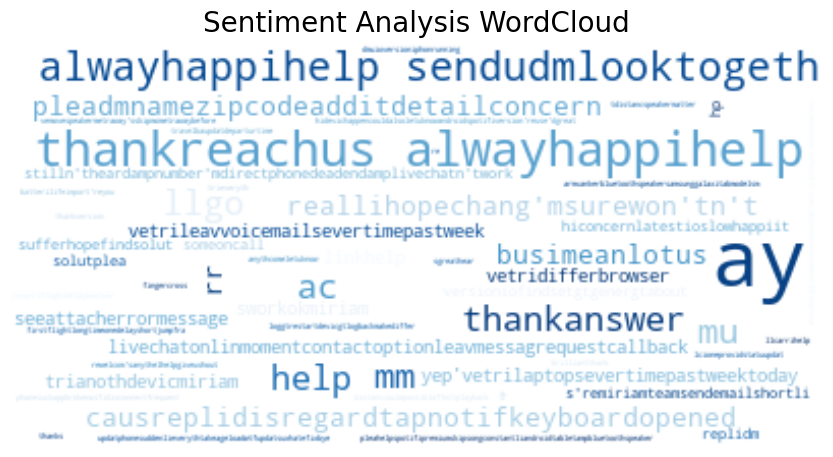

In [18]:
# Sentiment WordCloud
sentiments = ['positive', 'neutral', 'negative']
plt.figure(figsize = (25,10))
i = 1

for i, sentiment in enumerate(sentiments,1):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned'].dropna())
    if not text.strip():
        print(f"No text found for sentiment: {sentiment}")
        continue
    wordcloud = WordCloud(background_color = 'white', 
                          colormap = 'viridis' if sentiment == 'positive'
                                               else 'Blues' if sentiment == 'neutral'
                                               else 'Reds').generate(text)
    plt.subplot(1,3,i)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title('Sentiment Analysis WordCloud', fontsize=20)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

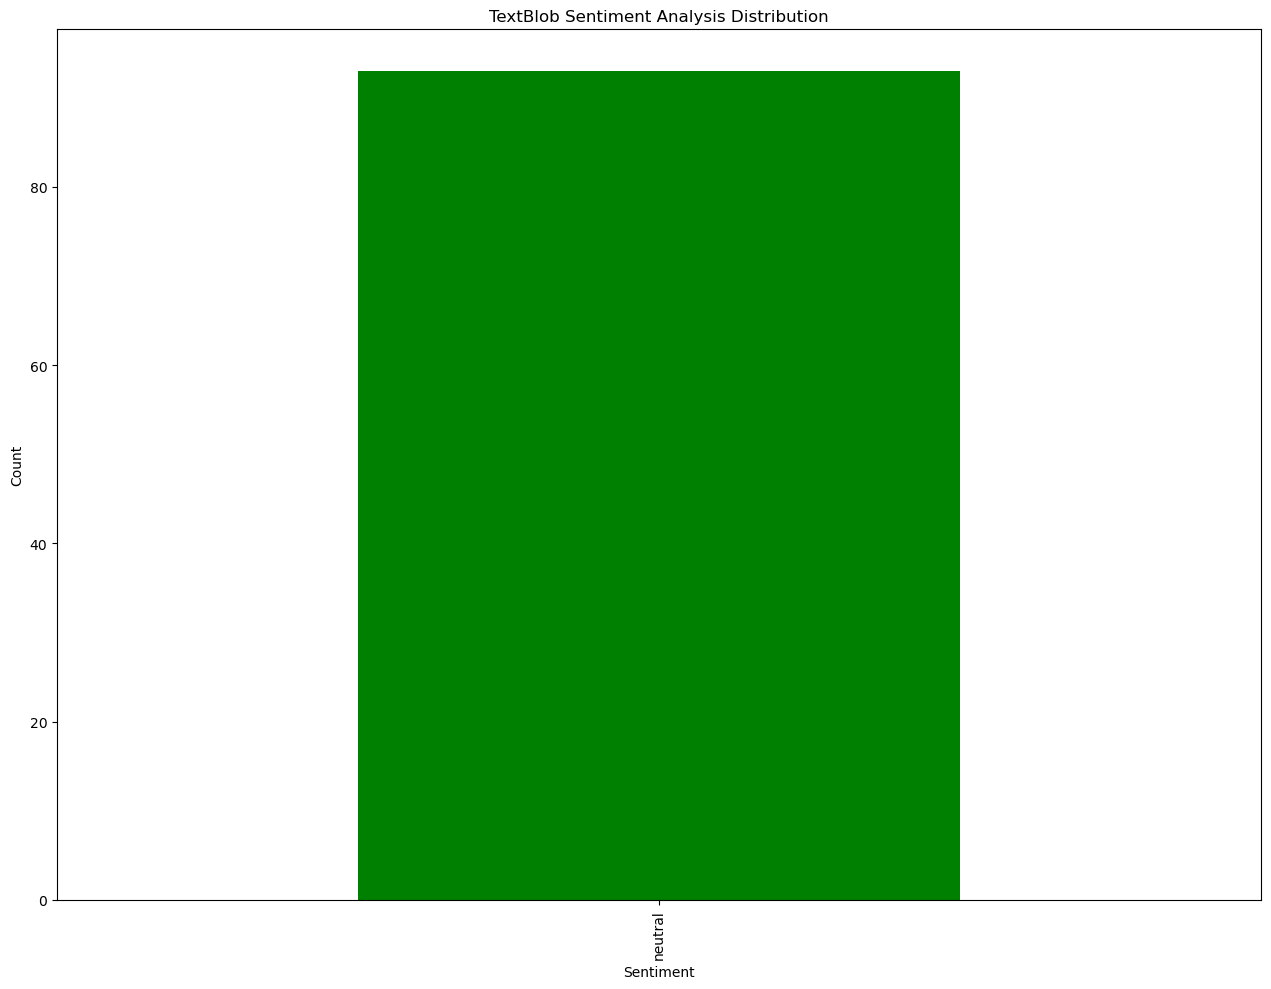

In [20]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
df['TB_Sentiment'].value_counts().plot(kind = 'bar', color =['green', 'blue', 'red'])
plt.title('TextBlob Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

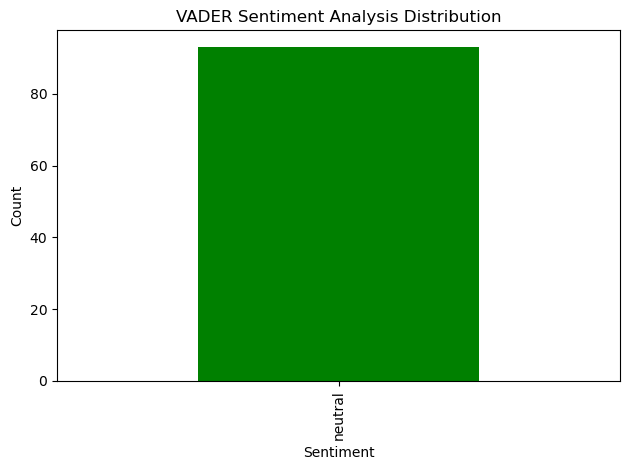

In [22]:
#plt.figure(figsize=(25,10))
#plt.subplot(1,2,1)
df['Sentiment'].value_counts().plot(kind = 'bar', color =['green', 'blue', 'red'])
plt.title('VADER Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()